In [31]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# 创建SparkSession
spark = SparkSession.builder.appName('MusicAnalysis').getOrCreate()

# 读取CSV文件
df = spark.read.csv('data/music_data.csv', header=True)




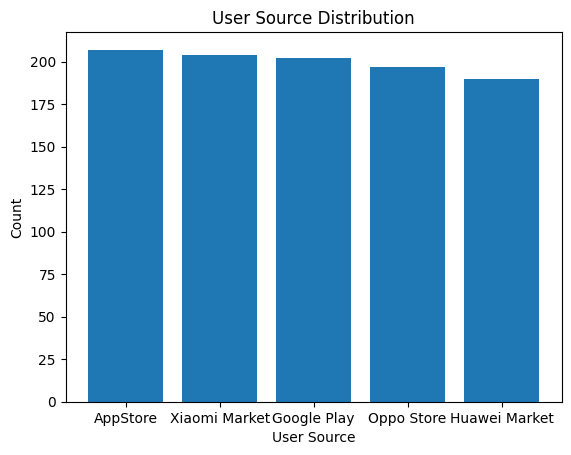

In [32]:

# 用户来源分布
source_count = df.groupBy('user_source').count().orderBy('count', ascending=False).toPandas()
plt.bar(source_count['user_source'], source_count['count'])
plt.title('User Source Distribution')
plt.xlabel('User Source')
plt.ylabel('Count')
plt.show()




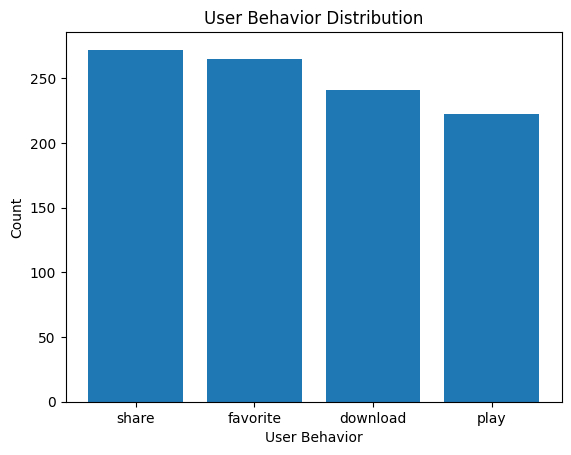

In [33]:
# 用户行为分布
behavior_count = df.groupBy('user_behavior').count().orderBy('count', ascending=False).toPandas()
plt.bar(behavior_count['user_behavior'], behavior_count['count'])
plt.title('User Behavior Distribution')
plt.xlabel('User Behavior')
plt.ylabel('Count')
plt.show()




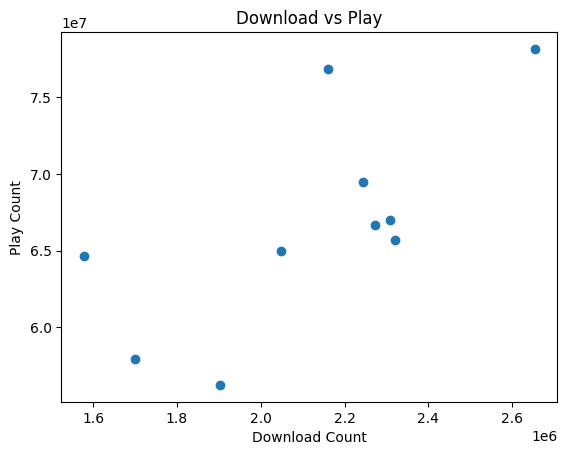

In [34]:
# 音乐下载量和播放量的关系
download_plays = df.groupBy('music_name').agg(F.sum('music_downloads').alias('download_sum'),
                                              F.sum('music_plays').alias('play_sum')).toPandas()
plt.scatter(download_plays['download_sum'], download_plays['play_sum'])
plt.title('Download vs Play')
plt.xlabel('Download Count')
plt.ylabel('Play Count')
plt.show()



/var/folders/dc/s7qx70fx44l4m7cvndrz2jsh0000gn/T/ipykernel_35490/90563064.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(source_behavior.pivot('user_source', 'user_behavior', 'count'), cmap='Blues', annot=True, fmt='d')


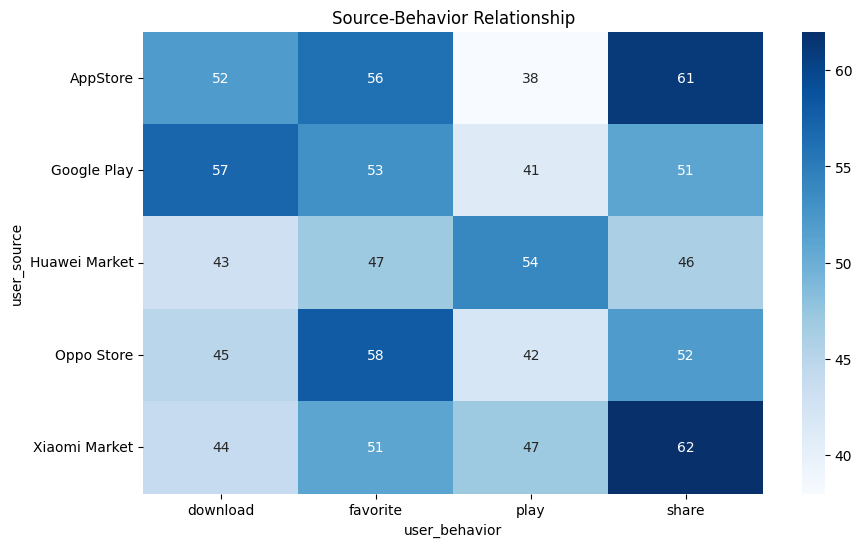

In [35]:
# 用户来源和行为的关系
source_behavior = df.groupBy('user_source', 'user_behavior').count().toPandas()
plt.figure(figsize=(10, 6))
plt.title('Source-Behavior Relationship')
sns.heatmap(source_behavior.pivot('user_source', 'user_behavior', 'count'), cmap='Blues', annot=True, fmt='d')
plt.show()


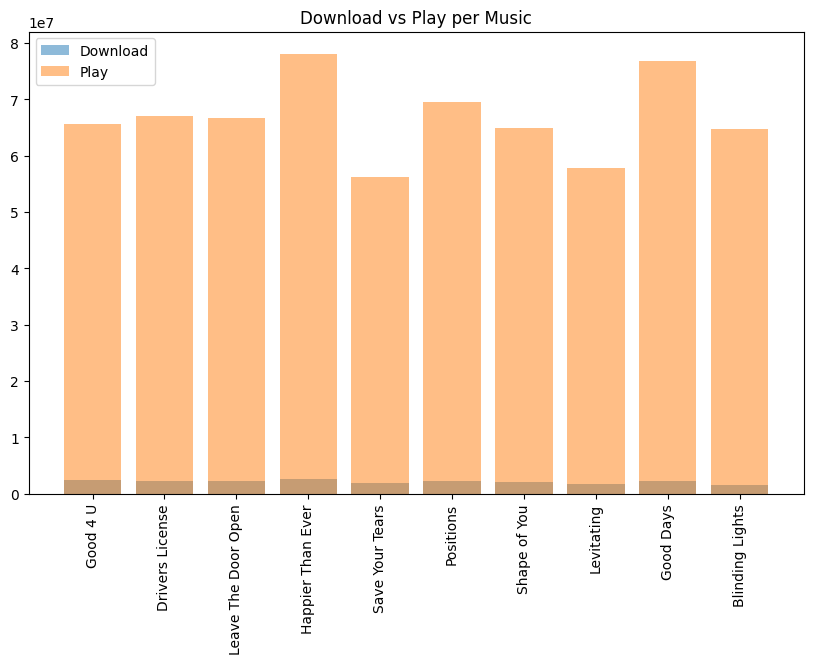

In [36]:
# 音乐下载量和播放量的对比
download_plays = df.groupBy('music_name').agg(F.sum('music_downloads').alias('download_sum'),
                                              F.sum('music_plays').alias('play_sum')).toPandas()
download_plays['download_per_play'] = download_plays['download_sum'] / download_plays['play_sum']
download_plays = download_plays.sort_values(by='download_per_play', ascending=False)
plt.figure(figsize=(10, 6))
plt.title('Download vs Play per Music')
plt.bar(download_plays['music_name'], download_plays['download_sum'], alpha=0.5, label='Download')
plt.bar(download_plays['music_name'], download_plays['play_sum'], alpha=0.5, label='Play')
plt.xticks(rotation=90)
plt.legend()
plt.show()


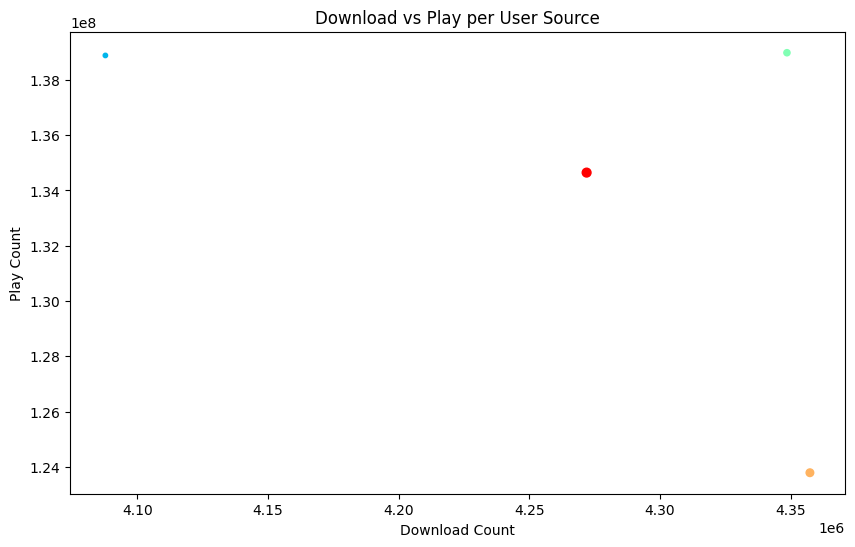

In [37]:
# 音乐下载量和播放量的关系和用户来源的关系
download_plays_source = df.groupBy('user_source').agg(F.sum('music_downloads').alias('download_sum'),
                                                      F.sum('music_plays').alias('play_sum')).toPandas()
plt.figure(figsize=(10, 6))
plt.title('Download vs Play per User Source')
plt.scatter(download_plays_source['download_sum'], download_plays_source['play_sum'], s=download_plays_source.index*10,
            c=download_plays_source.index, cmap='rainbow')
plt.xlabel('Download Count')
plt.ylabel('Play Count')
plt.show()


In [23]:
# 关闭SparkSession
spark.stop()